Завдання 1: Створення нейронної мережі для CIFAR-10
1. Завантаження датасету та виведення перших 10 зображень

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


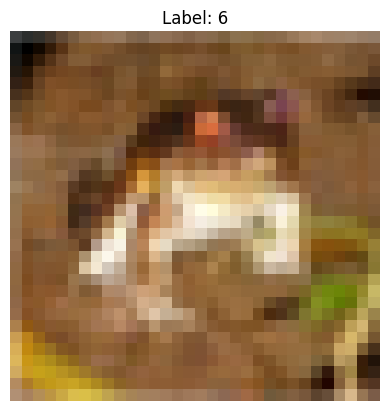

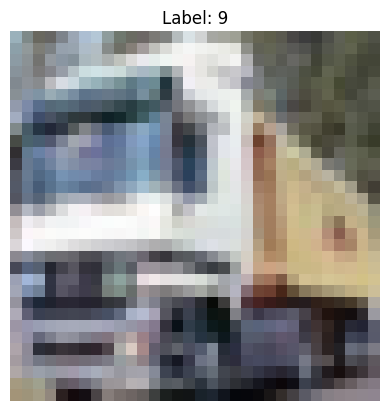

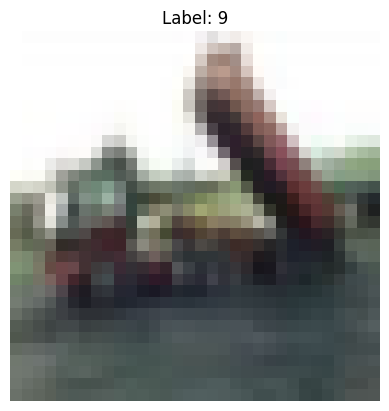

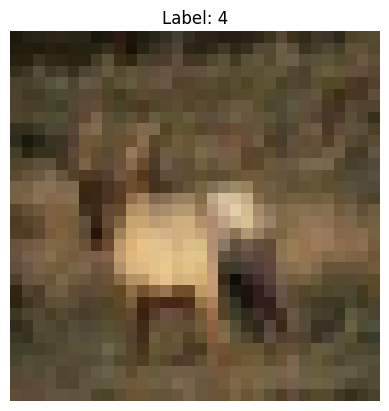

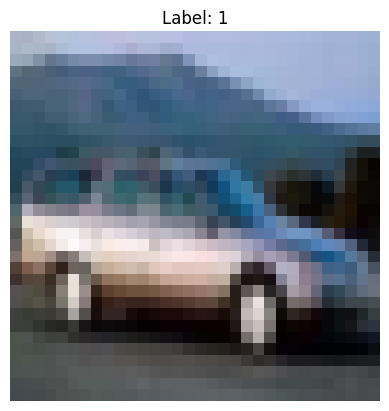

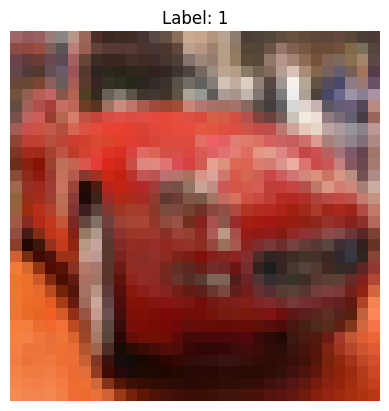

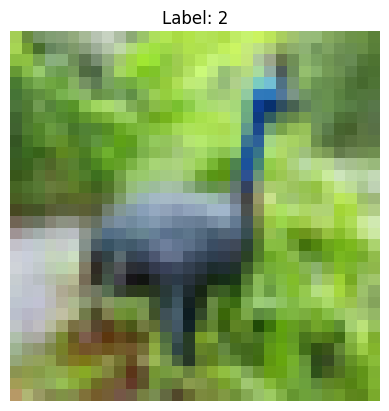

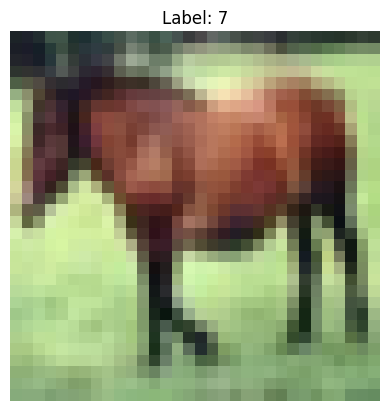

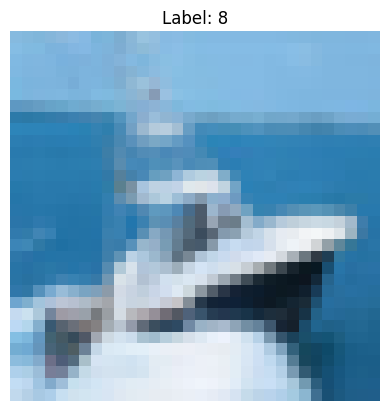

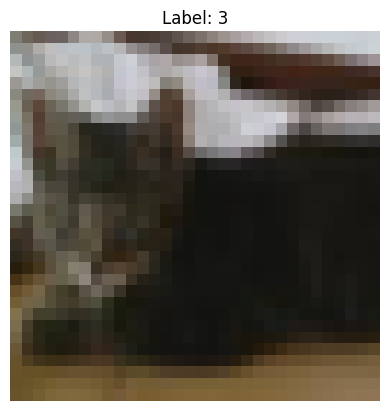

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Завантаження датасету CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Виведення перших 10 зображень
for i in range(10):
    plt.imshow(x_train[i])
    plt.title(f'Label: {y_train[i][0]}')
    plt.axis('off')
    plt.show()

2. Підготовка даних

In [2]:
# Нормалізація даних
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Конвертація міток у категоріальний формат
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

3. Підбір архітектури моделі

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Створення моделі
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Компільування моделі
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4. Використання кол-беків

In [4]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Навчання моделі
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=50,
                    batch_size=64,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 93ms/step - accuracy: 0.3602 - loss: 1.7517 - val_accuracy: 0.5540 - val_loss: 1.2705 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 90ms/step - accuracy: 0.5753 - loss: 1.2068 - val_accuracy: 0.6217 - val_loss: 1.0808 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 86ms/step - accuracy: 0.6373 - loss: 1.0452 - val_accuracy: 0.6474 - val_loss: 1.0314 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.6768 - loss: 0.9279 - val_accuracy: 0.6713 - val_loss: 0.9579 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.7058 - loss: 0.8471 - val_accuracy: 0.6820 - val_loss: 0.9288 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.7308 - loss: 0.7808 - val_accuracy: 0.6918 - val_loss: 0.9045 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.7504 - l

5. Виведення summary моделі

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 947,168 (3.61 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 631,446 (2.41 MB)

6. Побудова графіків функції втрат і точності

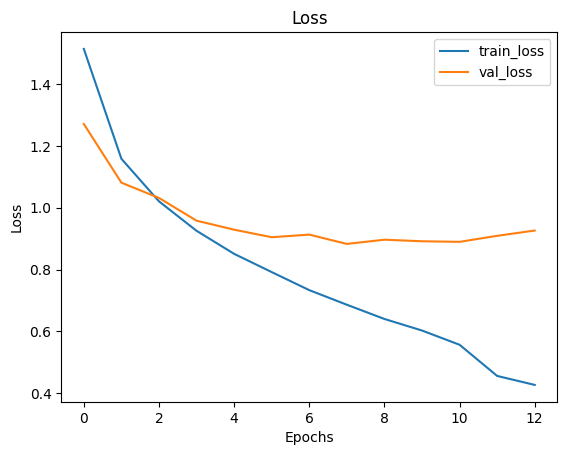

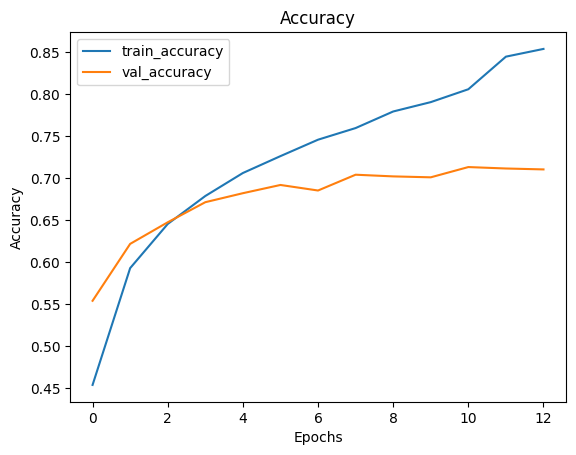

In [6]:
# Графік функції втрат
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Графік точності
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

7. Класифікаційний звіт

In [7]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_true = y_test.argmax(axis=-1)

print(classification_report(y_true, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1000
           1       0.82      0.83      0.82      1000
           2       0.61      0.61      0.61      1000
           3       0.51      0.56      0.53      1000
           4       0.69      0.61      0.65      1000
           5       0.64      0.60      0.62      1000
           6       0.74      0.80      0.77      1000
           7       0.79      0.73      0.76      1000
           8       0.79      0.82      0.81      1000
           9       0.81      0.79      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



8. Візуалізація розпізнавання

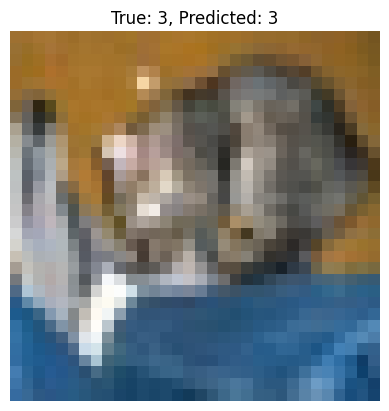

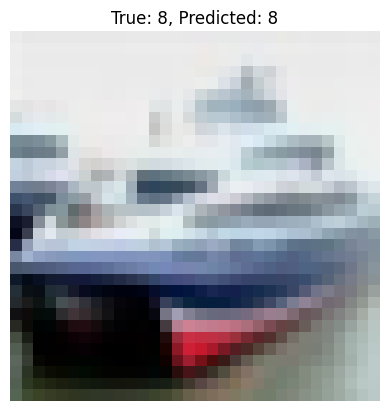

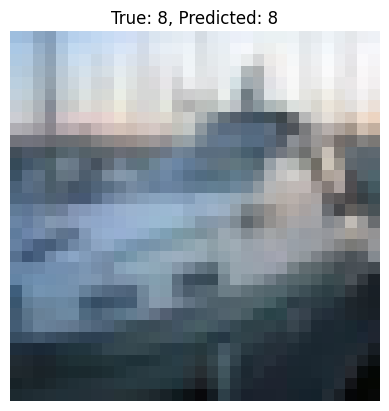

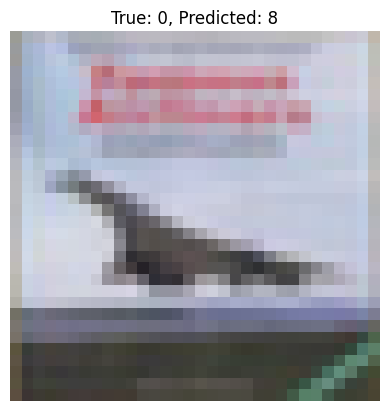

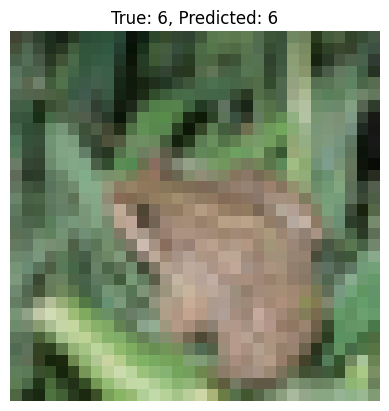

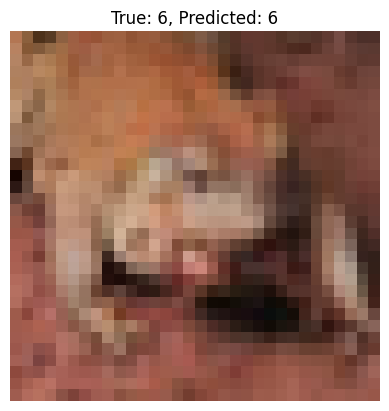

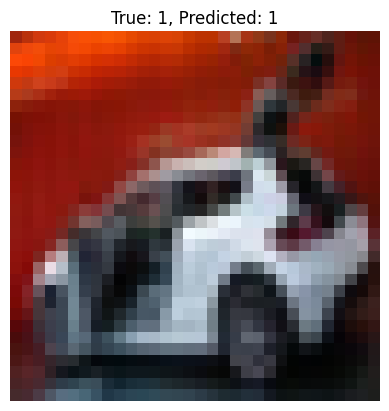

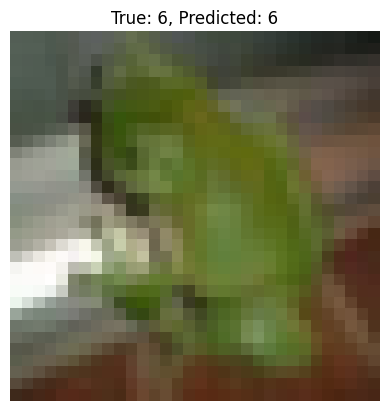

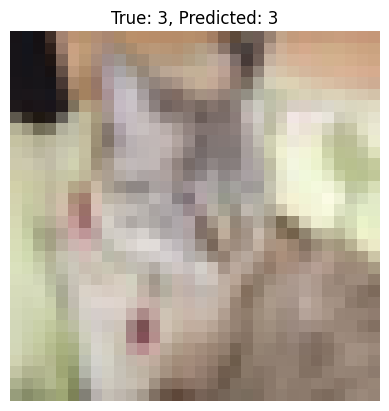

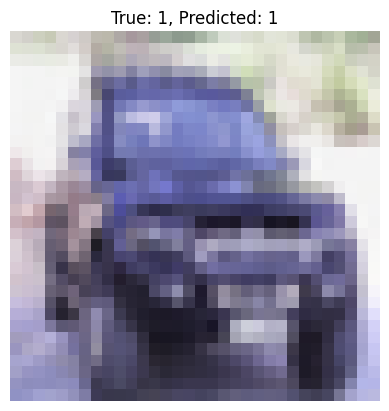

In [8]:
import numpy as np

# Візуалізація перших 10 прогнозів
for i in range(10):
    plt.imshow(x_test[i])
    plt.title(f'True: {y_true[i]}, Predicted: {y_pred_classes[i]}')
    plt.axis('off')
    plt.show()

Завдання 2: Побудова попередньо навчених моделей
1. Завантаження VGG16 та тонке налаштування

In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Завантаження VGG16 без верхнього шару та з передобробкою входів
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Заморожування частини шарів
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Додавання нових шарів
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Створення нової моделі
model_vgg = Model(inputs=base_model.input, outputs=predictions)

# Компільування моделі
model_vgg.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
